# House Price Prediction Using Regression

###  Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.

In [1]:
# importing necesssary packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing data.
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
test = pd.read_csv('test.csv')

In [6]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
x= train[['LotArea','GrLivArea','GarageArea','PoolArea','BedroomAbvGr','FullBath','HalfBath','TotRmsAbvGrd']]

In [8]:
y  = train['SalePrice']

In [9]:
x

,LotArea,GrLivArea,GarageArea,PoolArea,BedroomAbvGr,FullBath,HalfBath,TotRmsAbvGrd
0,8450,1710,548,0,3,2,1,8
1,9600,1262,460,0,3,2,0,6
2,11250,1786,608,0,3,2,1,6
3,9550,1717,642,0,3,1,0,7
4,14260,2198,836,0,4,2,1,9
...,...,...,...,...,...,...,...,...
1455,7917,1647,460,0,3,2,1,7
1456,13175,2073,500,0,3,2,0,7
1457,9042,2340,252,0,4,2,0,9
1458,9717,1078,240,0,2,1,0,5


In [10]:
x.isnull().sum()

LotArea         0
GrLivArea       0
GarageArea      0
PoolArea        0
BedroomAbvGr    0
FullBath        0
HalfBath        0
TotRmsAbvGrd    0
dtype: int64

In [11]:
cols = ['LotArea','GrLivArea','GarageArea','PoolArea','BedroomAbvGr','FullBath','HalfBath','TotRmsAbvGrd']

In [12]:
def counts(column):
    return x[column].value_counts()

In [13]:
for col in cols:
    print(counts(col))

LotArea
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: count, Length: 1073, dtype: int64
GrLivArea
864     22
1040    14
894     11
1456    10
848     10
        ..
2296     1
1123     1
1199     1
1473     1
1256     1
Name: count, Length: 861, dtype: int64
GarageArea
0      81
440    49
576    47
240    38
484    34
       ..
320     1
594     1
831     1
878     1
192     1
Name: count, Length: 441, dtype: int64
PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64
BedroomAbvGr
3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: count, dtype: int64
FullBath
2    768
1    650
3     33
0      9
Name: count, dtype: int64
HalfBath
0    913
1    535
2     12
Name: count, dtype: int64
TotRmsAbvGrd
6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
2 

C:\Users\HP\AppData\Local\Temp\ipykernel_24288\3463350790.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, bins = 20,kde= True, hist=False)


<Axes: xlabel='SalePrice', ylabel='Density'>

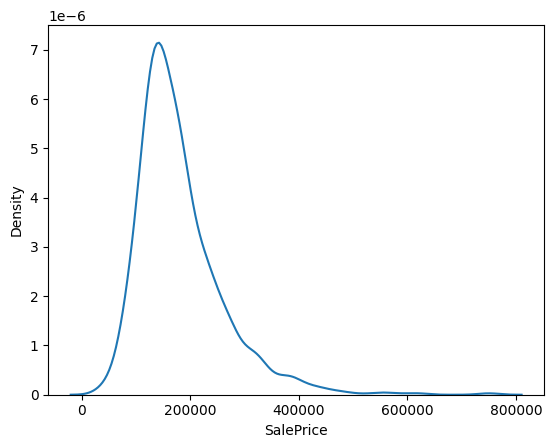

In [14]:
# Distribution of the data.
from scipy import stats
import seaborn as sns
sns.distplot(y, bins = 20,kde= True, hist=False)

### The distribution of the target feature is Left-skewed. 

In [15]:
# Transforming the target such that it looks normal distribution.
from scipy.stats import boxcox
y_transformed, best_lambda = boxcox(y)

C:\Users\HP\AppData\Local\Temp\ipykernel_24288\1385413884.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_transformed, hist=False, kde=True)


<Axes: ylabel='Density'>

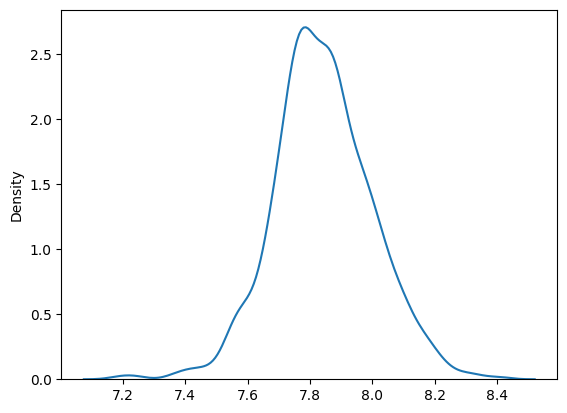

In [16]:
sns.distplot(y_transformed, hist=False, kde=True)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_transformed = scaler.fit_transform(x)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x_transformed,y_transformed,test_size=0.2,random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [21]:
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error,r2_score

In [28]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.0092047764169837
Root Mean Squared Error: 0.09594152603009659
